In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
my_region = boto3.session.Session().region_name
print(f"My region is: {my_region}")

s3 = boto3.client('s3', aws_access_key_id = aws_access_key_id, aws_secret_access_key = aws_secret_access_key)

My region is: eu-west-2


In [13]:
bucket_name = 'sales-prediction-bucket'
csv_key1 =  'Features_data_set.csv' 
csv_key2 = 'sales_data_set.csv' 
csv_key3 = 'stores_data_set.csv' 

obj1 = s3.get_object(Bucket = bucket_name, Key = csv_key1)
obj2 = s3.get_object(Bucket = bucket_name, Key = csv_key2)
obj3 = s3.get_object(Bucket = bucket_name, Key = csv_key3)

df_features = pd.read_csv(obj1['Body'])
df_sales = pd.read_csv(obj2['Body'])
df_stores = pd.read_csv(obj3['Body'])

In [16]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [20]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [21]:
df_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [22]:
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [23]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [24]:
df_sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [25]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [26]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [27]:
df_stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [30]:
df_features['Date'] = pd.to_datetime(df_features['Date'], format = "%d/%m/%Y")
df_sales['Date'] = pd.to_datetime(df_sales['Date'], format = "%d/%m/%Y")

## Merge the datasets into a single dataframe

In [32]:
df = pd.merge(df_sales, df_features, on = ['Store', 'Date', 'IsHoliday'] )

In [33]:
df = pd.merge(df, df_stores, on = ['Store'], how = 'left')

In [37]:
df.head(100)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,24,2010-02-12,8050.24,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
96,1,25,2010-02-12,13268.75,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
97,1,26,2010-02-12,10050.92,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
98,1,27,2010-02-12,2339.50,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315


In [44]:
df['Month'] = df['Date'].dt.strftime('%m')

In [46]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,02
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,02
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,02
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,02
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,02


## Exploratory data analysis

<Axes: >

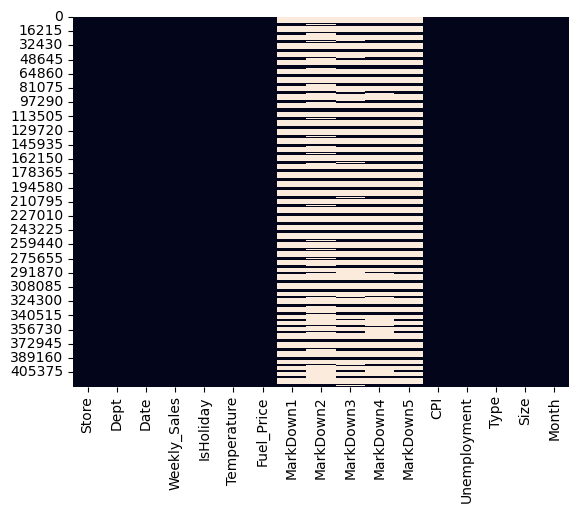

In [47]:
sns.heatmap(df.isnull(), cbar = False)

In [50]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Month                0
dtype: int64

In [51]:
df.fillna(0)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,02
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,02
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,02
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,02
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10


In [52]:
df.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375360,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328


In [54]:
df.duplicated().sum()

0

In [55]:
df['Type'].value_counts()

Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

In [63]:
df['IsHoliday'] = df['IsHoliday'].apply(lambda x: 0 if x == False else 1 )

## Create the training and testing datasets

In [67]:
df_target = df['Weekly_Sales']
df_final = df.drop(columns = ['Weekly_Sales', 'Date'])

df_final = pd.get_dummies(df_final, columns = ['Type', 'Store', 'Dept'], drop_first = True)
print(df_final.shape)

(421570, 139)


In [69]:
X = np.array(df_final).astype('float32')
y = np.array(df_target).astype('float32')
y = y.reshape(-1, 1)

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 123)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 123)

## Local XGBoost

In [73]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 1.1 MB/s eta 0:00:00:00:0100:01


In [75]:
import xgboost as xgb

model = xgb.XGBRegressor(objective = 'reg:squarederror',
                         learning_rate = 0.1,
                         max_depth = 5,
                         n_estimators = 100)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [76]:
result = model.score(X_test, y_test)

print(f"Accuracy: {result}")

Accuracy: 0.8201109945077187


In [77]:
y_predict = model.predict(X_test)

In [80]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, y_predict)
RMSE = float(format(np.sqrt(MSE), '.3f'))
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1 - ((1 - r2) * (n - 1)/(n - k - 1))

print(f"MSE: {MSE:.3f} | RMSE: {RMSE:.3f} | MAE: {MAE:.3f}| R2: {r2:.3f} | Adjusted R2: {adj_r2:.3f}")

MSE: 96354728.000 | RMSE: 9816.044 | MAE: 6454.409| R2: 0.820 | Adjusted R2: 0.819


In [82]:
# Retrain the model but with a lower max_depth

model = xgb.XGBRegressor(objective = 'reg:squarederror',
                         learning_rate = 0.1,
                         max_depth = 5,
                         n_estimators = 50)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [83]:
result = model.score(X_test, y_test)

print(f"Accuracy: {result}")

Accuracy: 0.7421762333214474


In [84]:
y_predict = model.predict(X_test)

In [85]:
MSE = mean_squared_error(y_test, y_predict)
RMSE = float(format(np.sqrt(MSE), '.3f'))
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1 - ((1 - r2) * (n - 1)/(n - k - 1))

print(f"MSE: {MSE:.3f} | RMSE: {RMSE:.3f} | MAE: {MAE:.3f}| R2: {r2:.3f} | Adjusted R2: {adj_r2:.3f}")

MSE: 138099264.000 | RMSE: 11751.564 | MAE: 8070.487| R2: 0.742 | Adjusted R2: 0.741


## XGBoost using Sagemaker

In [87]:
# Convert data to the format expected from Sagemaker

train_data = pd.DataFrame({'Target': y_train[:,0]})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,1]
    
val_data = pd.DataFrame({'Target': y_val[:,0]})
for i in range(X_val.shape[1]):
    val_data[i] = X_val[:,1]

/tmp/ipykernel_6334/2421456816.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data[i] = X_train[:,1]
/tmp/ipykernel_6334/2421456816.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data[i] = X_train[:,1]
/tmp/ipykernel_6334/2421456816.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy

In [89]:
val_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,129,130,131,132,133,134,135,136,137,138
0,1532.510010,82.690002,82.690002,82.690002,82.690002,82.690002,82.690002,82.690002,82.690002,82.690002,...,82.690002,82.690002,82.690002,82.690002,82.690002,82.690002,82.690002,82.690002,82.690002,82.690002
1,6234.689941,41.759998,41.759998,41.759998,41.759998,41.759998,41.759998,41.759998,41.759998,41.759998,...,41.759998,41.759998,41.759998,41.759998,41.759998,41.759998,41.759998,41.759998,41.759998,41.759998
2,28638.960938,80.440002,80.440002,80.440002,80.440002,80.440002,80.440002,80.440002,80.440002,80.440002,...,80.440002,80.440002,80.440002,80.440002,80.440002,80.440002,80.440002,80.440002,80.440002,80.440002
3,12104.740234,57.580002,57.580002,57.580002,57.580002,57.580002,57.580002,57.580002,57.580002,57.580002,...,57.580002,57.580002,57.580002,57.580002,57.580002,57.580002,57.580002,57.580002,57.580002,57.580002
4,8966.759766,30.450001,30.450001,30.450001,30.450001,30.450001,30.450001,30.450001,30.450001,30.450001,...,30.450001,30.450001,30.450001,30.450001,30.450001,30.450001,30.450001,30.450001,30.450001,30.450001


In [90]:
print(val_data.shape)

(31618, 140)


In [91]:
train_data.to_csv('train.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [92]:
import sagemaker 
import boto3
from sagemaker import Session

sagemaker_session = sagemaker.Session()

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [94]:
prefix = 'XGBoost_Regressor'
key = 'XGBoost_Regressor'

role = sagemaker.get_execution_role()
print(f"Sagemaker execution role: {role}")

Sagemaker execution role: arn:aws:iam::125544413952:role/service-role/AmazonSageMaker-ExecutionRole-20231220T102516


In [124]:
import os
with open('train.csv', 'rb') as f:
    boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


In [125]:
s3_train_data = 's3://{}/{}/train/{}'.format(bucket_name, prefix, key)
print(f"Uploaded the training data to: {s3_train_data}")

Uploaded the training data to: s3://sales-prediction-bucket/XGBoost_Regressor/train/XGBoost_Regressor


In [126]:
import os
with open('validation.csv', 'rb') as f:
    boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)
    
s3_validation_data = 's3://{}/{}/validation/{}'.format(bucket_name, prefix, key)
print(f"Uploaded the validation data to: {s3_validation_data}")

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


Uploaded the validation data to: s3://sales-prediction-bucket/XGBoost_Regressor/validation/XGBoost_Regressor


In [129]:
output_location = 's3://{}/{}/output'.format(bucket_name, prefix)
print(f"Training artifacts will be uploaded to: {output_location}")

Training artifacts will be uploaded to: s3://sales-prediction-bucket/XGBoost_Regressor/output


In [130]:
from sagemaker import image_uris

boto3.setup_default_session(region_name = 'eu-west-2')
container = image_uris.retrieve('xgboost', version = '0.90-2', region = boto3.Session().region_name)

INFO:sagemaker.image_uris:Defaulting to only available Python version: py3
INFO:sagemaker.image_uris:Defaulting to only supported image scope: cpu.


In [131]:
Xgboost_regressor1 = sagemaker.estimator.Estimator(image_uri = container,
                                                  role = role,
                                                  instance_count = 1,
                                                  instance_type = 'ml.m5.large',
                                                  output_path = output_location,
                                                  sagemaker_session = sagemaker_session,
                                                  use_spot_instances = True,
                                                  max_run = 300,
                                                  max_wait = 600)

Xgboost_regressor1.set_hyperparameters(max_depth = 10,
                                      objective = 'reg:linear',
                                      colsample_bytree = 0.3,
                                      alpha = 10,
                                      eta = 0.1,
                                      num_round = 100)

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


In [132]:
train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type = 'csv', s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_validation_data, content_type = 'csv', s3_data_type = 'S3Prefix')

data_channels = {'train': train_input, 'validation': valid_input}

Xgboost_regressor1.fit(data_channels)

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2023-12-20-13-39-31-470


2023-12-20 13:39:31 Starting - Starting the training job...
2023-12-20 13:39:53 Starting - Preparing the instances for training......
2023-12-20 13:40:58 Downloading - Downloading input data......
2023-12-20 13:41:54 Downloading - Downloading the training image...
2023-12-20 13:42:24 Training - Training image download completed. Training in progress.....INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:linear to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[13:42:31] 358334x139 matrix with 49808426 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
INFO

## Deploy the model

In [149]:
Xgboost_regressor = Xgboost_regressor1.deploy(
    initial_instance_count=1,
    instance_type='ml.m5.xlarge'  # Choose an instance type with more resources
)

INFO:sagemaker:Deleting endpoint configuration with name: sagemaker-xgboost-2023-12-20-13-47-25-598
INFO:sagemaker:Deleting endpoint with name: sagemaker-xgboost-2023-12-20-13-47-25-598
INFO:sagemaker:Creating model with name: sagemaker-xgboost-2023-12-20-14-02-17-153
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2023-12-20-14-02-17-153
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2023-12-20-14-02-17-153


----!

In [175]:
input_data = '\n'.join([','.join(map(str, row)) for row in X_test[0:5000]])
                              
# Make predictions
Xgboost_regressor.content_type = 'text/csv'
predictions = Xgboost_regressor.predict(input_data)

In [176]:
predictions

b'8595.4267578125,9935.2646484375,8084.16357421875,9345.181640625,10095.9619140625,10814.521484375,9248.9384765625,11271.0732421875,9679.1953125,9524.353515625,9986.7744140625,10076.58203125,8940.59765625,9803.376953125,9807.1748046875,9679.44140625,10311.7060546875,9670.1689453125,9923.8759765625,9525.4169921875,9468.3095703125,10106.2861328125,9348.4677734375,11744.537109375,9025.2080078125,9614.208984375,8832.638671875,9081.6826171875,9592.5458984375,9703.74609375,14297.2060546875,10059.75,9378.5791015625,11379.4755859375,9877.953125,9584.158203125,9649.3095703125,9649.3095703125,9649.3095703125,8775.9931640625,9562.255859375,8932.96875,8697.0771484375,10162.8271484375,9597.81640625,8824.7392578125,9715.78125,9312.6328125,9036.56640625,9713.255859375,9787.328125,9443.3671875,8953.4677734375,8614.5732421875,8664.9306640625,9893.4755859375,9478.271484375,9102.841796875,9525.5068359375,9075.8779296875,9842.0791015625,9440.8447265625,9913.2744140625,9900.572265625,9360.310546875,12489.3

In [177]:
def bytes_to_array(x):
    
    prediction_string = str(x).split(',')
    prediction_string[0] = prediction_string[0][2:]
    prediction_string[-1] = prediction_string[-1][:-1]
    
    for i in range(len(prediction_string)):
        prediction_string[i] = float(prediction_string[i])
        
    prediction_string = np.array(prediction_string).astype('float32')
    
    return prediction_string.reshape(-1, 1)

In [178]:
predicted_values = bytes_to_array(predictions)

In [179]:
predicted_values.shape

(5000, 1)

In [180]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

k = X_test.shape[1]
n = len(X_test)
y_test5000 = y_test[:5000,:]

MSE = mean_squared_error(y_test5000, predicted_values)
RMSE = float(format(np.sqrt(MSE), '.3f'))
MAE = mean_absolute_error(y_test5000, predicted_values)
r2 = r2_score(y_test5000, predicted_values)
adj_r2 = 1 - ((1 - r2) * (n - 1)/(n - k - 1))

print(f"MSE: {MSE:.3f} | RMSE: {RMSE:.3f} | MAE: {MAE:.3f}| R2: {r2:.3f} | Adjusted R2: {adj_r2:.3f}")

MSE: 527900832.000 | RMSE: 22976.092 | MAE: 13128.869| R2: -0.062 | Adjusted R2: -0.067


In [181]:
# The values are worse as I use a smaller sample to save on computational resources and costs

In [182]:
Xgboost_regressor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: sagemaker-xgboost-2023-12-20-14-02-17-153
INFO:sagemaker:Deleting endpoint with name: sagemaker-xgboost-2023-12-20-14-02-17-153
